<h2> <b> Modelling Stock Price Variations as a Bachelier-Wiener Process



```
Vraj Gandhi       - 202201425
Kaushik Prajapati - 202201472
```



<p align="justify">
This notebook models stock price variations of companies listed on the NIFTY (National Stock Exchange, India) using the Bachelier-Wiener process. The modeling is based on insights from the research paper <i>IJMPC stocks.pdf</i>, and the data spans from January 1997 to April 2019 (22 years), sourced from the NIFTY website.

We work with multiple `txt` files that relate to different aspects of stock behavior and correspond to the figures in the reference paper:
</p>

<ul>
  <li><b>price.txt</b>: Contains time and the daily average price of the stock index. (Fig. 1)</li>
  <li><b>fluctuations.txt</b>: Contains time and the daily percentage fluctuation in stock prices. (Fig. 2)</li>
  <li><b>gaussian.txt</b>: Contains fluctuations and their frequency to analyze distribution. (Fig. 3)</li>
  <li><b>wiener.txt</b>: 
    <ul>
      <li>Monthly average of log stock values (third column) — used for Fig. 4</li>
      <li>Wiener variance of the monthly average (fourth column) — used for Fig. 5</li>
    </ul>
  </li>
  <li><b>trade.txt</b>: Contains time and daily trading volume. (Fig. 6)</li>
</ul>

<p><b>Project tasks:</b></p>
<ul>
  <li>Understand each figure and the mathematical modeling approach (including relevant equations and parameters from Table I).</li>
  <li>Reproduce all six plots from the research paper using the given data.</li>
  <li>Summarize three key insights from the modeling of stock price variations.</li>
</ul>


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [20]:
def stock_analysis(x_values, y_values, names, labels, styles, linewidth, log=False):

    plt.figure(figsize=(10, 8))
    for i in range(len(x_values)):
        plt.plot(x_values[i], y_values[i], linestyle=styles[i], label=names[i], linewidth=linewidth[i])
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    if log:
        plt.yscale('log')
    plt.legend()
    plt.show()

def extractData(file_path):

    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(line.strip().split())
        for i in range(len(data)):
            for j in range(len(data[i])):
                data[i][j] = float(data[i][j])
    return data

In [21]:
price_path = './data/price.txt'
data = extractData(price_path)

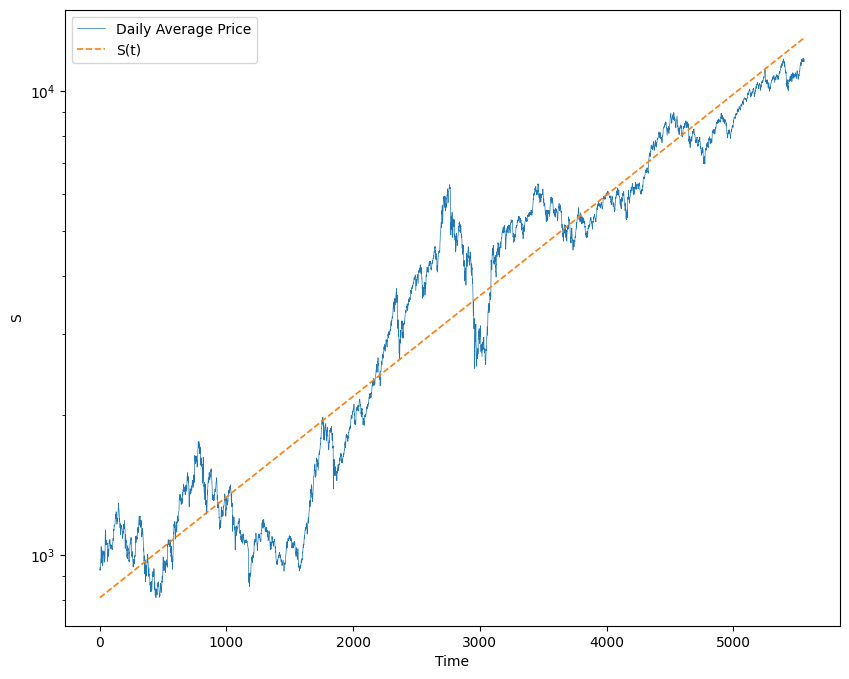

In [22]:
df_price = pd.DataFrame(data, columns = ['id', 'time', 'price'])
df_price.head()

So = min(df_price['price'])
a = 5e-4
S = So * np.exp(a * df_price['time'])
stock_analysis(x_values = [df_price['time'], df_price['time']], y_values = [df_price['price'], S], names=['Daily Average Price', 'S(t)'], labels=['Time', 'S'], styles=["-", "--"], linewidth=[0.5, 1.2], log=True)
# stock_analysis(x_values = [df_price['time'], df_price['time']], y_values = [np.log(df_price['price']), np.log(S)], names=['Daily Average Price', 'S(t)'], labels=['Time', 'Daily Average Price'])


In [23]:
price_path = './data/fluctuations.txt'
data = extractData(price_path)

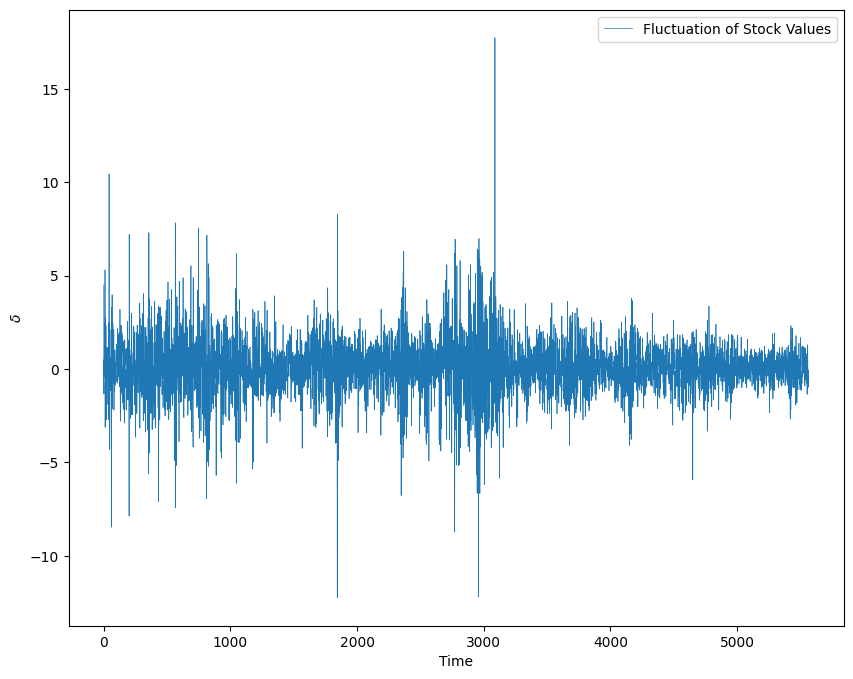

In [24]:
df_price = pd.DataFrame(data, columns = ['id', 'time', 'fluctuation'])
df_price.head()

stock_analysis(x_values = [df_price['time']], y_values = [df_price['fluctuation']], names=['Fluctuation of Stock Values'], labels=['Time', r'$\delta$'], styles=["-"], linewidth=[0.5])
# stock_analysis(x_values = [df_price['time'], df_price['time']], y_values = [np.log(df_price['price']), np.log(S)], names=['Daily Average Price', 'S(t)'], labels=['Time', 'Daily Average Price'])


In [25]:
price_path = './data/gaussian.txt'
data = extractData(price_path)

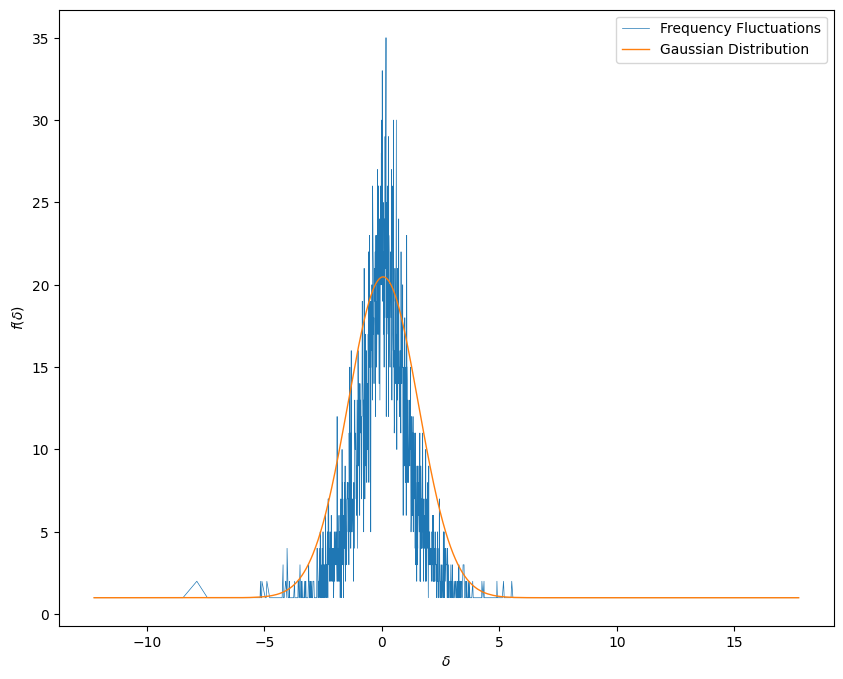

In [26]:
df_gauss = pd.DataFrame(data, columns = ['id', 'percentage', 'frequency'])
df_gauss.head()

mu = 0.057
sigma = 1.495
gauss = 1 + 73 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((df_gauss['percentage'] - mu) ** 2) / (2 * sigma ** 2))
stock_analysis(x_values = [df_gauss['percentage']]*2, y_values = [df_gauss['frequency'], gauss], names=['Frequency Fluctuations', 'Gaussian Distribution'], labels=[r'$\delta$', r'$f(\delta)$'], styles=["-", '-'], linewidth=[0.5, 1])


Slope:  0.010543858579243233


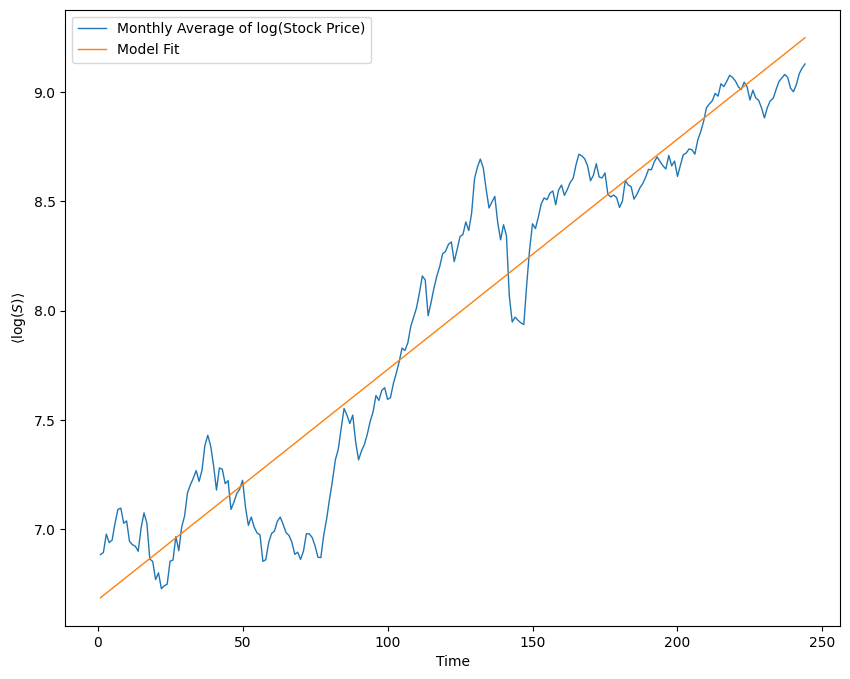

In [27]:
price_path = './data/wiener.txt'
data = extractData(price_path)

df_wiene = pd.DataFrame(data, columns = ['time', 'na', 'log_price_avg', 'wiener_var','check'])
df_wiene.head()

x = np.array(df_wiene['time']).reshape(-1, 1) 
y = np.array(df_wiene['log_price_avg'])

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

model.coef_
print("Slope: ", model.coef_[0])

stock_analysis(
    x_values = [df_wiene['time'],df_wiene['time']],
    y_values = [df_wiene['log_price_avg'],y_pred],
    names = ['Monthly Average of log(Stock Price)','Model Fit'],
    labels = ['Time', r'$\langle \log(S) \rangle$'],
    styles = ['-','-'],
    linewidth = [1,1],
)

# stock_analysis(x_values = [df_price['time'], df_price['time']], y_values = [df_price['price'], S], names=['Daily Average Price', 'S(t)'], labels=['Time', 'S'], styles=["-", "--"], linewidth=[0.5, 1.2], log=True)


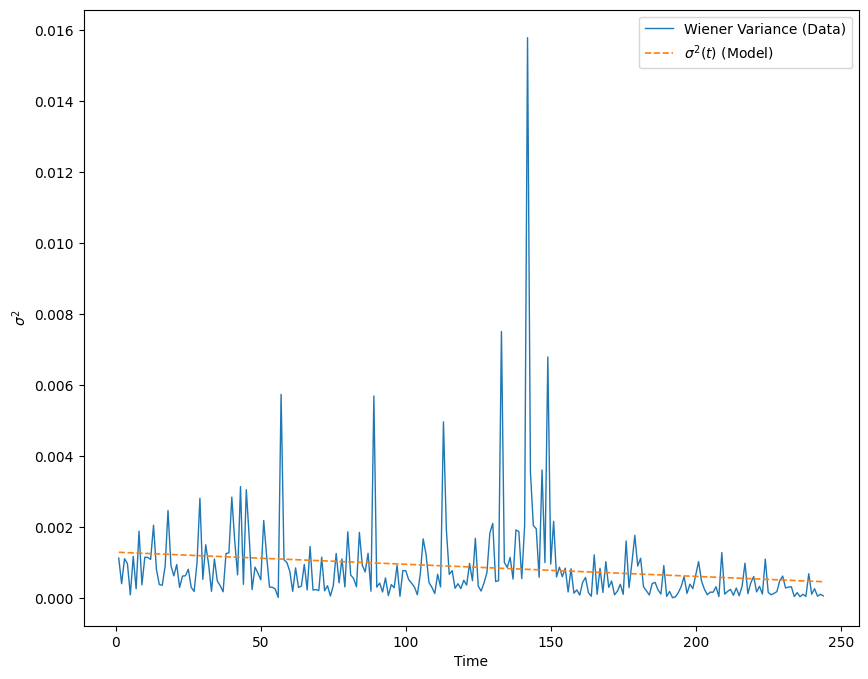

In [28]:
w = -3.41e-6
sigma_sq = w * df_wiene['time'] + 0.0013

stock_analysis(
    x_values = [df_wiene['time'], df_wiene['time']],
    y_values = [df_wiene['wiener_var'], sigma_sq],
    names = ['Wiener Variance (Data)', r'$\sigma^2(t)$ (Model)'],
    labels = ['Time', r'$\sigma^2$'],
    styles = ['-', '--'],
    linewidth = [1, 1.2]
)

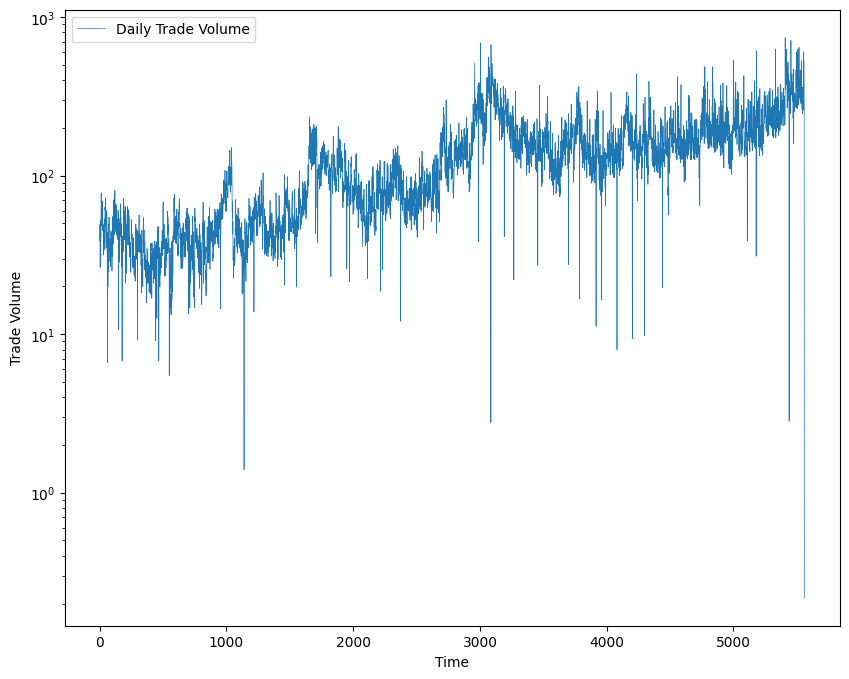

In [29]:
price_path = './data/trade.txt'
data = extractData(price_path)

df_trade = pd.DataFrame(data, columns = ['id', 'time', 'volume'])
df_trade.head()

stock_analysis(
    x_values = [df_trade['time']],
    y_values = [df_trade['volume']],
    names = ['Daily Trade Volume'],
    labels = ['Time', 'Trade Volume'],
    styles = ['-'],
    linewidth = [0.5],
    log = True
)
